<a href="https://colab.research.google.com/github/kanchan2612/Amazone-Customer-Reviews-Sentiment-Analysis/blob/main/Assignment_(no_sc_vs_gdp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using web scraping Technique the data is extracted from the following website:**
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(real)_per_capita_growth_rate

https://en.wikipedia.org/wiki/TOP500


In [ ]:
#import library's
import numpy as np
import pandas as pd
import plotly.express as px

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
gdp=pd.read_csv("/content/drive/MyDrive/gdp data/Gdp.csv")
number_sc=pd.read_csv("/content/drive/MyDrive/gdp data/no_supercomputer.csv")

In [ ]:
gdp=gdp.iloc[1:,0:2]

In [ ]:
gdp['2010-2018 annual growth']=gdp['2010-2018 annual growth'].str.replace('%','').astype(float)


In [ ]:
gdp.rename(columns={'Region':'Countries','2010-2018 annual growth':'GDP per capita growth 2010-2018'},inplace=True)
gdp.head()

,Countries,GDP per capita growth 2010-2018
1,Eurozone,1.09
2,North America,1.45
3,East Asia and the Pacific,3.70
4,South Asia,5.21
5,Sub-Saharan Africa,0.63


In [ ]:
number_sc.rename(columns={'Country/Region':'Countries','Jun 2020[30]':'Number of SuperComputer in 2020','Nov 2010[49]':'Number of SuperComputer in 2010'},inplace=True)
number_sc.head()

,Countries,Number of SuperComputer in 2010,Number of SuperComputer in 2020
0,China,41,226
1,United States,274,114
2,EU,108,79
3,Japan,26,29
4,France,26,19


In [ ]:
df=pd.merge(gdp,number_sc,on='Countries')
df['GDP per capita growth 2010-2018']=100*df['GDP per capita growth 2010-2018']

df['GDP per capita growth 2010-2018']=df['GDP per capita growth 2010-2018'].astype(int)
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
df.index=a
df.head


<bound method NDFrame.head of          Countries  ...  Number of SuperComputer in 2020
1        Australia  ...                                2
2          Austria  ...                                1
3          Belgium  ...                                0
4           Brazil  ...                                4
5           Canada  ...                               12
6            China  ...                              226
7          Denmark  ...                                0
8            Egypt  ...                                0
9            Spain  ...                                1
10         Finland  ...                                2
11          France  ...                               19
12  United Kingdom  ...                               10
13          Greece  ...                                0
14       Indonesia  ...                                0
15           India  ...                                2
16          Israel  ...                                0
1

# Data Analysis 

In [ ]:
#Plotting the scatter plot by considering the x-axis as Number of Supercomputers 2010/2020 and y-axis as Gdp growth 2010-2018 and considering countries as points on the plot.
fig = px.scatter(df,x = 'Number of SuperComputer in 2010', y = 'GDP per capita growth 2010-2018',
                 size=df['Number of SuperComputer in 2010'],height=700,title='Number of Supercomputer 2010 Vs GDP Per Capita Growth 2010-2018',
                 log_x =True,log_y=True,color =df['Countries'],text=df['Countries'])
fig.update_traces(textposition = 'top center')
fig.update_layout(showlegend = True)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.scatter(df,x = 'Number of SuperComputer in 2020', y = 'GDP per capita growth 2010-2018',
                 size=df['Number of SuperComputer in 2020'],height=700,title='Number of Supercomputer 2020 Vs GDP Per Capita Growth 2010-2020',
                 log_x =True,log_y=True,color =df['Countries'],text=df['Countries'],trendline="ols")
fig.update_traces(textposition = 'top center')
fig.update_layout(showlegend = True)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()





# Regression Scatter Plot

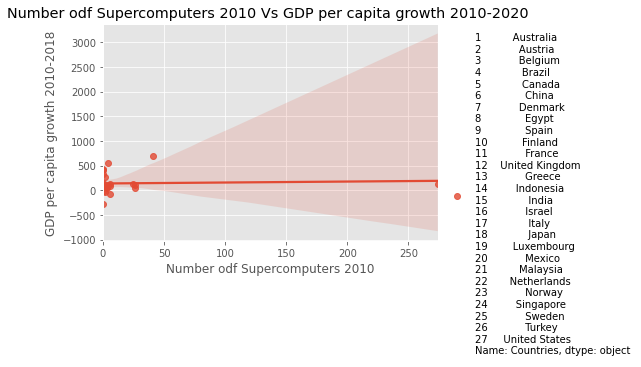

In [ ]:
sns.regplot(x=df['Number of SuperComputer in 2010'], y=df['GDP per capita growth 2010-2018'], data=df,label=df['Countries']);
plt.xlabel('Number odf Supercomputers 2010')
plt.ylabel('GDP per capita growth 2010-2018')
plt.title('Number odf Supercomputers 2010 Vs GDP per capita growth 2010-2020 ')

plt.legend(loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.show()


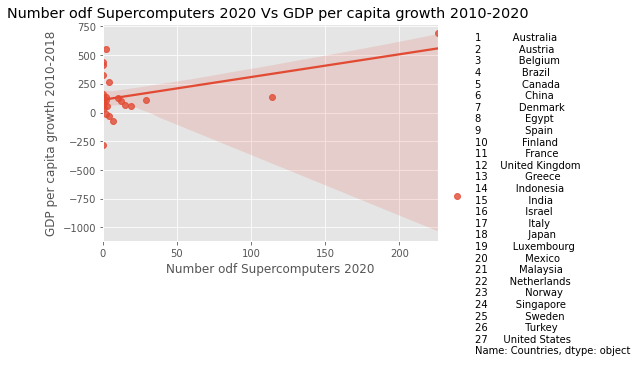

In [ ]:
sns.regplot(x=df['Number of SuperComputer in 2020'], y=df['GDP per capita growth 2010-2018'], data=df,label=df['Countries']);
plt.xlabel('Number odf Supercomputers 2020')
plt.ylabel('GDP per capita growth 2010-2018')
plt.title('Number odf Supercomputers 2020 Vs GDP per capita growth 2010-2020 ')

plt.legend(loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.show()

In [ ]:
xs=df['Number of SuperComputer in 2010']
ys=df['GDP per capita growth 2010-2018']
zs=df['Number of SuperComputer in 2020']
m, b = np.polyfit(xs, ys, 1)
regression_line = [(m*x)+b for x in xs]
regression_line = []

for x in xs:
    regression_line.append((m*x)+b)



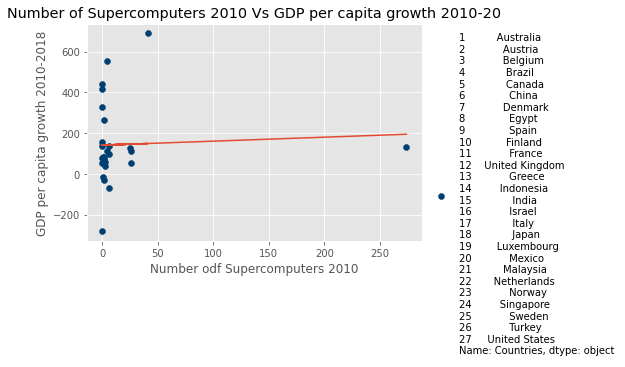

In [ ]:

style.use('ggplot')
plt.scatter(xs,ys,color='#003F72',label=df["Countries"])
plt.plot(xs, regression_line)
plt.xlabel('Number odf Supercomputers 2010')
plt.ylabel('GDP per capita growth 2010-2018')
plt.title('Number of Supercomputers 2010 Vs GDP per capita growth 2010-20')

plt.legend(loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.show()

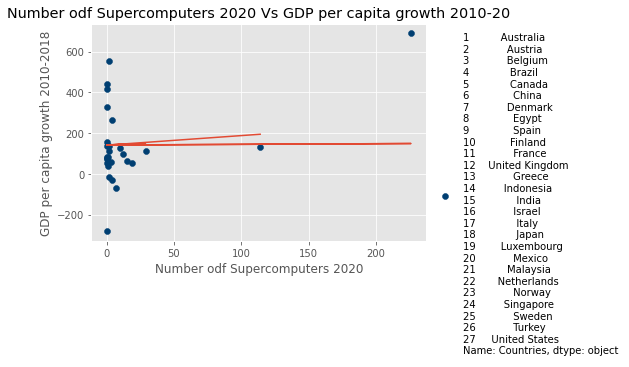

In [ ]:
style.use('ggplot')
plt.scatter(zs,ys,color='#003F72',label=df["Countries"])
plt.plot(zs, regression_line)
plt.xlabel('Number odf Supercomputers 2020')
plt.ylabel('GDP per capita growth 2010-2018')
plt.title('Number odf Supercomputers 2020 Vs GDP per capita growth 2010-20')

plt.legend(loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.show()

**Considering the above plots it shows that many in countries at the year 2010 ,they have less number of supercomputer  with respect to gdp capita growth but in 2020 there is slight increase in the growth of number of supercomputer**.

# Linear Regression Model

In [ ]:

X=df.iloc[:, 2].values
y=df.iloc[:, 1].values
X=X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))
y_pred = model.predict(X_test)
df2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 185.9250830876886
Mean Squared Error: 90866.20275687752
Root Mean Squared Error: 301.4402142330673


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df.iloc[:, 3].values
y=df.iloc[:, 1].values
X=X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))
y_pred = model.predict(X_test)
df3= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 186.48657127633308
Mean Squared Error: 91242.52368756199
Root Mean Squared Error: 302.0637742059812
